In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

In [ ]:
df = pd.read_csv('drive/MyDrive/Dataset/MusicDataset.csv')
df.head()

,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_name,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,release,song_hotttnesss,start_of_fade_out,tempo,time_signature,time_signature_confidence,title,year,bbhot
0,0.780462,0.574275,ARMQHX71187B9890D3,NaN,"Atlanta, GA",NaN,Mastodon,280.21506,0.238,5,0.555,-3.306,1,0.500,Call of the Mastodon,0.597641,275.528,173.205,5,0.120,Deep Sea Creature,2001,0
1,0.581794,0.401998,ARD7TVE1187B99BFB1,NaN,California - LA,NaN,Casual,218.93179,0.247,1,0.736,-11.197,0,0.636,Fear Itself,0.602120,218.932,92.198,4,0.778,I Didn't Mean To,0,0
2,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,"Memphis, TN",-90.04892,The Box Tops,148.03546,0.148,6,0.169,-9.843,0,0.430,Dimensions,NaN,137.915,121.274,4,0.384,Soul Deep,1969,1
3,0.487357,0.343428,ARKRRTF1187B9984DA,NaN,NaN,NaN,Sonora Santanera,177.47546,0.282,8,0.643,-9.689,1,0.565,Las Numero 1 De La Sonora Santanera,NaN,172.304,100.070,1,0.000,Amor De Cabaret,0,0
4,0.630382,0.454231,AR7G5I41187FB4CE6C,NaN,"London, England",NaN,Adam Ant,233.40363,0.000,0,0.751,-9.013,1,0.749,Friend Or Foe,NaN,217.124,119.293,4,0.000,Something Girls,1982,0


In [ ]:
df.shape

(10001, 23)

In [ ]:
df.isnull().sum()

artist_familiarity              4
artist_hotttnesss               0
artist_id                       0
artist_latitude              6259
artist_location              4292
artist_longitude             6259
artist_name                     0
duration                        0
end_of_fade_in                  0
key                             0
key_confidence                  0
loudness                        0
mode                            0
mode_confidence                 0
release                         0
song_hotttnesss              4352
start_of_fade_out               0
tempo                           0
time_signature                  0
time_signature_confidence       0
title                           1
year                            0
bbhot                           0
dtype: int64

In [ ]:
drop_list = ['artist_location', 'artist_latitude', 'artist_longitude','artist_name', 'release', 'title']
train = df.drop(drop_list, axis=1)

In [ ]:
# Filling up the null values:

train["song_hotttnesss"] = train["song_hotttnesss"].fillna(train["song_hotttnesss"].mean())
train["artist_familiarity"] = train["artist_familiarity"].fillna(train["artist_familiarity"].median())
train.isnull().sum()

artist_familiarity           0
artist_hotttnesss            0
artist_id                    0
duration                     0
end_of_fade_in               0
key                          0
key_confidence               0
loudness                     0
mode                         0
mode_confidence              0
song_hotttnesss              0
start_of_fade_out            0
tempo                        0
time_signature               0
time_signature_confidence    0
year                         0
bbhot                        0
dtype: int64

In [ ]:
train['bbhot'].value_counts()

0    8809
1    1192
Name: bbhot, dtype: int64

In [ ]:
#graph distribution of an attribute of songs that are hot
def freq(col):
   g = sns.kdeplot(train[col][(train["bbhot"] == 1)], color="Blue", shade = True)
   g.set_xlabel(col)
   g.set_ylabel("Frequency")
   g = g.legend(["1"])
   plt.show()

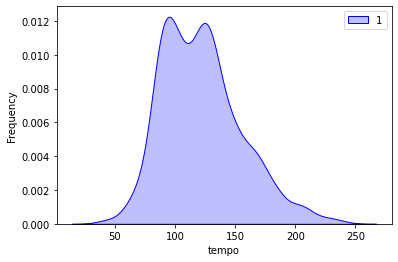

In [ ]:
freq("tempo")

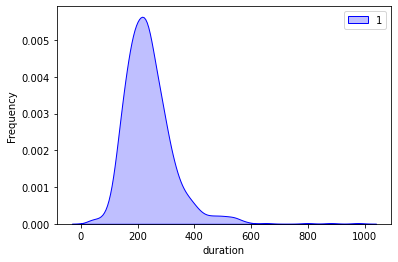

In [ ]:
freq("duration")

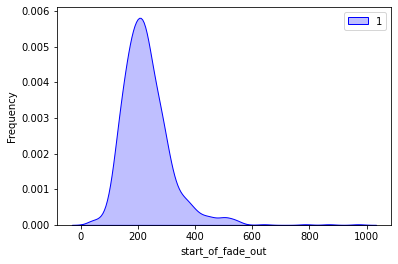

In [ ]:
freq("start_of_fade_out")

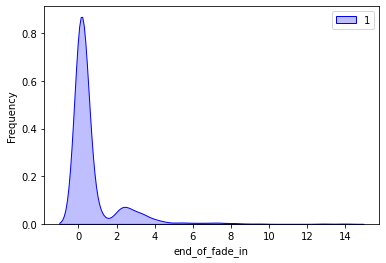

In [ ]:
freq("end_of_fade_in")

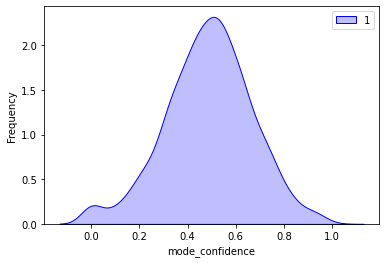

In [ ]:
freq("mode_confidence")

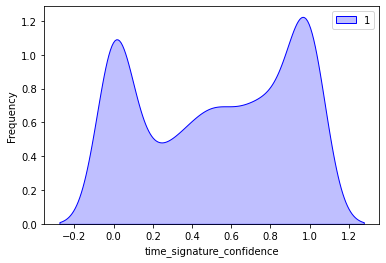

In [ ]:
freq("time_signature_confidence")

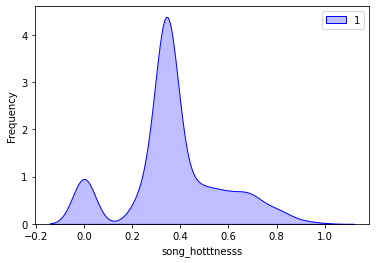

In [ ]:
freq("song_hotttnesss")

In [ ]:
train1 = train.drop(['artist_id', 'bbhot'], axis = 1)

In [ ]:
train2 = train1.drop(['end_of_fade_in', 'key', 'key_confidence', 'mode', 'mode_confidence', 'year'], axis = 1)

In [ ]:
train2.head()

,artist_familiarity,artist_hotttnesss,duration,loudness,song_hotttnesss,start_of_fade_out,tempo,time_signature,time_signature_confidence
0,0.780462,0.574275,280.21506,-3.306,0.597641,275.528,173.205,5,0.120
1,0.581794,0.401998,218.93179,-11.197,0.602120,218.932,92.198,4,0.778
2,0.630630,0.417500,148.03546,-9.843,0.342867,137.915,121.274,4,0.384
3,0.487357,0.343428,177.47546,-9.689,0.342867,172.304,100.070,1,0.000
4,0.630382,0.454231,233.40363,-9.013,0.342867,217.124,119.293,4,0.000


In [ ]:
train2.columns

Index(['artist_familiarity', 'artist_hotttnesss', 'duration', 'loudness',
       'song_hotttnesss', 'start_of_fade_out', 'tempo', 'time_signature',
       'time_signature_confidence'],
      dtype='object')

In [ ]:
Y = train['bbhot'].copy(deep=True)
Y.shape

(10001,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train2, Y, test_size=0.3, random_state=0)

In [ ]:
clf1 = MLPClassifier(hidden_layer_sizes=(200,150,50), max_iter=200,activation = 'relu',solver='adam',random_state=1)
clf1.fit(X_train, y_train)

print(clf1.score(X_train, y_train))

0.8791428571428571


In [ ]:
#Predicting y for X_val
y_pred = clf1.predict(X_test)
clf1.score(X_test, y_test)

0.8847050983005664

In [ ]:
# Model evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2655
           1       0.00      0.00      0.00       346

    accuracy                           0.88      3001
   macro avg       0.44      0.50      0.47      3001
weighted avg       0.78      0.88      0.83      3001



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


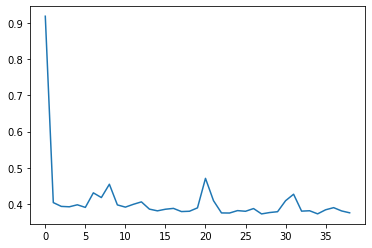

In [ ]:
# Plotting graph for MLPClassifier

loss_values = clf1.loss_curve_
plt.plot(loss_values)
plt.show()

In [ ]:
import pickle

pickle.dump(clf1, open('drive/MyDrive/Dataset/DataScience-Pianalytix-Models/music-popularity-model.pkl', 'wb'))